## 1. Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## 2. Importing the DataSet

In [62]:
ds = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## 3. Now Visualizing the dataset

In [63]:
ds.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 4. Now Checking the Null Values 

In [64]:
ds.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### So, In the given DataSet no any NULL values

## 5. Now getting the Information about the DataSet

In [65]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [66]:
ds.shape

(25, 2)

## 6. Now describing the DataSet

In [67]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 7. Now Visualize the DataSet
### Hours Vs Percentage

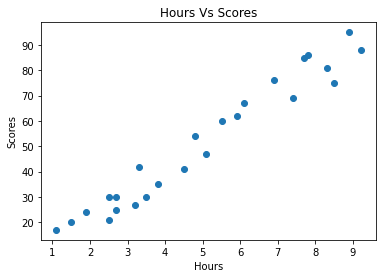

In [68]:
plt.scatter(ds['Hours'], ds['Scores'])
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### The above graph show the Relation between Hours and Scores

## 8. Now, for the prediction first we SPLIT the DataSet

#### Splitting in two parts TEST & TRAIN

In [69]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

## 9. loading the modules for the Simple Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

#### Initializing object for Linear Regression

In [72]:
linear_reg = LinearRegression()

## 10. Train the Algorithm

In [73]:
linear_reg.fit(x_train,y_train)

## Training Completed

LinearRegression()

### Plotting The Regression Line

In [74]:
line = linear_reg.coef_*x + linear_reg.intercept_

### Plotting the train Data

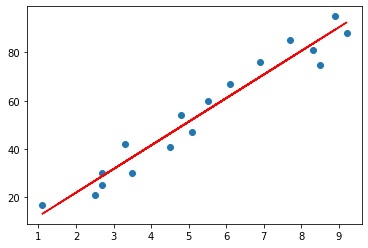

In [75]:
plt.scatter(x_train , y_train)
plt.plot(x , line , color = "red")
plt.show()

### Plotting for the Test Data

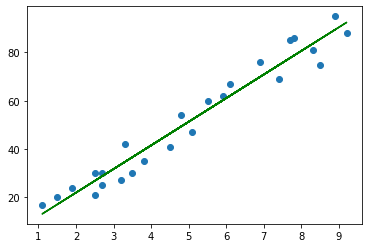

In [76]:
plt.scatter(x, y)
plt.plot(x, line,color = 'green');
plt.show()

## 11. Making the Predictions

In [77]:
## Testing data - In Hours
print(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [78]:
## Predicting the scores
y_pred = linear_reg.predict(x_test) 
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


## 12. Now Comparing Actual Vs Predicted

In [79]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## 13. Now predict, What will be predicted score if a student studyies for 9.25 hrs/day

In [80]:
hours = 9.25
pred = linear_reg.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/day is",pred[0])

The predicted score if a student studies for 9.25 hrs/day is 92.91505723477056


## Error in my Prediction

In [81]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
